In [1]:
# Install if needed
# !pip install nltk seaborn matplotlib tensorflow

import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv('/content/IMDB Dataset.csv')
print("Sample data:")
print(df.head())

Sample data:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
review       0
sentiment    0
dtype: int64


In [4]:
df['sentiment'] = df['sentiment'].astype(str).str.strip().str.lower()
# Map 'positive' to 'pos' and 'negative' to 'neg'
df['sentiment'] = df['sentiment'].map({'positive': 'pos', 'negative': 'neg'})
# Remove rows with NaN values in the sentiment column after mapping
df.dropna(subset=['sentiment'], inplace=True)
valid_labels = ['pos', 'neg']
df = df[df['sentiment'].isin(valid_labels)]

In [5]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [6]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special chars/numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [7]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

In [8]:
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}


--- Naive Bayes ---
Accuracy: 0.8512
Classification Report:
              precision    recall  f1-score   support

         neg       0.85      0.84      0.85      4961
         pos       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



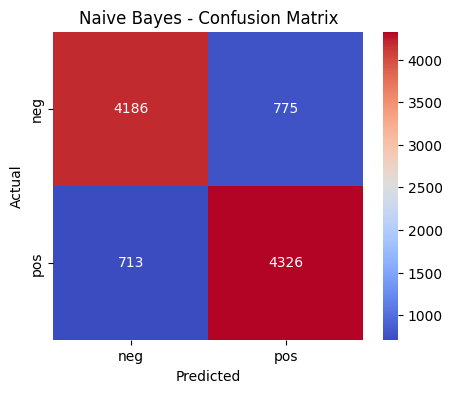


--- Logistic Regression ---
Accuracy: 0.8868
Classification Report:
              precision    recall  f1-score   support

         neg       0.90      0.87      0.88      4961
         pos       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



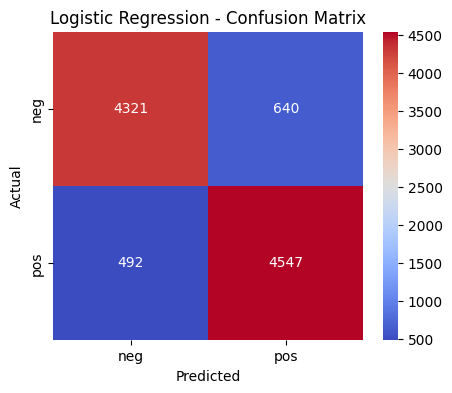

In [10]:
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 106ms/step - accuracy: 0.5116 - loss: 0.6926 - val_accuracy: 0.6350 - val_loss: 0.6388
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 130s 104ms/step - accuracy: 0.5976 - loss: 0.6455 - val_accuracy: 0.6797 - val_loss: 0.6446
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 105ms/step - accuracy: 0.6313 - loss: 0.6242 - val_accuracy: 0.5331 - val_loss: 0.6719
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 105ms/step - accuracy: 0.5485 - loss: 0.6530 - val_accuracy: 0.8065 - val_loss: 0.4922
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 104ms/step - accuracy: 0.8375 - loss: 0.4093 - val_accuracy: 0.8723 - val_loss: 0.3034
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step

--- LSTM Evaluation ---
Accuracy: 0.8723
Classification Report:
              precision    recall  f1-score   support

         neg       0.85      0.90      0.88      4961
         pos       0.90      0.84      0.87      5039

    accuracy                           0.87     10000
   macro a

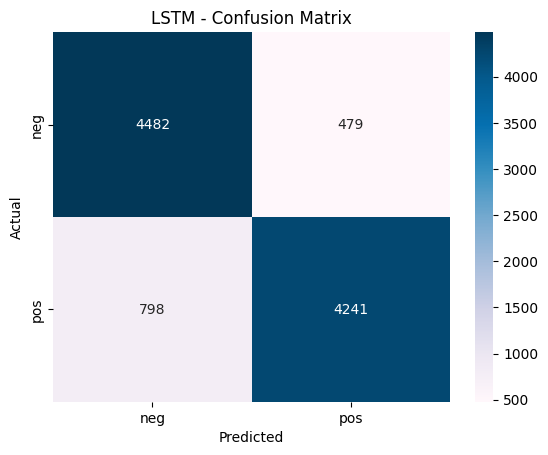

In [11]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Encode labels
label_map = {'neg': 0, 'pos': 1}
y_train_bin = y_train.map(label_map).values
y_test_bin = y_test.map(label_map).values

# LSTM Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(X_train_pad, y_train_bin, epochs=5, validation_data=(X_test_pad, y_test_bin), batch_size=32)

# Predict
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n--- LSTM Evaluation ---")
print("Accuracy:", accuracy_score(y_test_bin, y_pred))
print("Classification Report:")
print(classification_report(y_test_bin, y_pred, target_names=['neg', 'pos']))

cm = confusion_matrix(y_test_bin, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.title('LSTM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
